# Evaluating & Prediction

In [ ]:
"""
Keras 버젼으로 진행합니다
"""
None

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Build Model

In [12]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [13]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

In [21]:
num_epochs = 1
batch_size = 64

In [22]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True)

938/938 [==============================] - 118s 121ms/step - loss: 0.2157 - accuracy: 0.9306


---
# Evaluating

학습한 모델 평가

In [23]:
model.evaluate(test_x, test_y, batch_size=batch_size)  # test 데이터로 평가 진행

157/157 [==============================] - 3s 19ms/step - loss: 0.0386 - accuracy: 0.9862


[0.03864440694451332, 0.9861999750137329]

# 결과 확인
Input 으로 들어갈 이미지 데이터 확인

In [24]:
test_image = test_x[0, :, :, 0]  # test 의 첫번째 batch 의 첫번째 이미지
test_image.shape

(28, 28)

In [25]:
test_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

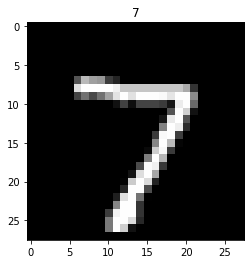

In [26]:
# 시각화
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

# Predict

In [28]:
# 이미지 한장을 모델에 넣고 예측(predict)
pred = model.predict(test_image.reshape(1, 28, 28, 1))  # 모델에 집어넣을때는 다시 4차원 변환
pred

array([[1.15250955e-08, 1.16295205e-08, 2.26123302e-06, 1.13739397e-05,
        2.99243130e-10, 2.18552643e-09, 1.00085348e-12, 9.99983788e-01,
        2.00947756e-08, 2.63862898e-06]], dtype=float32)

In [ ]:
# predict() 는 모델의 변수(variable) 에 영향을 주지 않는다.

#### np.argmax()

In [29]:
# pred 에서 가장 높은 '자극'을 찾기, 가장 높은 값을 찾기
np.argmax(pred)

7

In [30]:
np.sum(pred)

1.0000001

In [31]:
# 예측 잘 되었다.

# 이제는 batch size 로 한번에 넣어보기

## Test Batch
Batch 로 Test Dataset 넣기

In [32]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

In [33]:
# 위 batch 를 predict() 에 넣는다
preds = model.predict(test_batch)

preds.shape

(32, 10)

In [34]:
preds

array([[1.15250955e-08, 1.16295427e-08, 2.26123302e-06, 1.13739507e-05,
        2.99243130e-10, 2.18553065e-09, 1.00085532e-12, 9.99983788e-01,
        2.00948147e-08, 2.63863171e-06],
       [5.98802387e-07, 3.73201729e-05, 9.99961495e-01, 3.32863806e-07,
        1.57787405e-09, 6.14680806e-11, 2.11269473e-08, 4.12743750e-09,
        2.80042400e-07, 4.27717667e-10],
       [8.00236705e-07, 9.99939442e-01, 3.79770722e-06, 4.36818596e-07,
        1.34251668e-05, 1.38211828e-06, 5.62660091e-07, 3.67278044e-05,
        9.02074135e-07, 2.43562135e-06],
       [9.99984145e-01, 1.40169110e-09, 2.76083369e-06, 3.09209902e-08,
        1.27733619e-08, 8.50699990e-08, 1.12125581e-05, 9.81670837e-07,
        3.77001506e-08, 7.37954679e-07],
       [5.45372139e-08, 1.87492873e-07, 4.04274999e-07, 4.56197080e-09,
        9.99788225e-01, 1.87494308e-07, 1.42350552e-06, 1.34185996e-06,
        4.10134163e-07, 2.07930265e-04],
       [1.57320159e-07, 9.99973178e-01, 8.08962170e-07, 4.22440110e-08,
   

In [35]:
np.argmax(preds)  # <-- 우리가 원하는 결과가 아니다  

130

In [36]:
np.argmax(preds, axis=-1)  # 32개의 예측값 출력

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

In [37]:
# 위 결과와 실제 데이터 비교 => 시각화로

#### 시각화

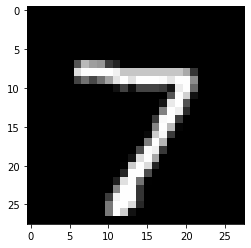

In [38]:
# 첫번째는 7 
plt.imshow(test_batch[0, :, :, 0], 'gray')
plt.show()

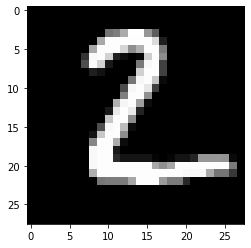

In [39]:
# 두번째는 2
plt.imshow(test_batch[1, :, :, 0], 'gray')
plt.show()

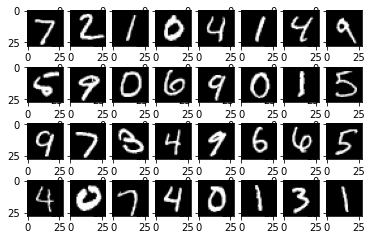

In [40]:
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(test_batch[i, :, :, 0], 'gray')
    
plt.show()

In [41]:
np.argmax(preds, axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

### evaluate()  vs. predict() 차이점

In [ ]:
# evaluate(x, y, ...)  <= 정답도 같이 주어져서 평가
# predict(x)  <-- 오직 예측만 함.  (즉 label 이 필요 없다.)

# Saving Model
학습한 모델 저장

- 저장한 모델은
    - 나중에 예측용으로 사용
    - 나중에 추가 학습을 위해서도 사용

In [42]:
save_path = r'D:\DevRoot\DataSet\my_model.h5'
model.save(save_path)

In [43]:
model.save(save_path, include_optimizer=True)
# optimizer 도 같이 저장함
# 나중에 로드 후에 compile 했던 것들을 반복 안해도 됨.  --> 로드후 곧바로 training 가능

## Load Model

In [44]:
del(model)

In [45]:
preds = model.predict(test_batch)

NameError: name 'model' is not defined

In [46]:
model = tf.keras.models.load_model(save_path)
model

In [47]:
preds = model.predict(test_batch)
preds.shape

(32, 10)